In [41]:
# Imports
import os

from selenium import webdriver
from selenium.webdriver.support import expected_conditions as EC
from langdetect import detect_langs
from googletrans import Translator
# Imports for VADER model
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
# Imports for RoBERTa model
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
from scipy.special import softmax
from wordcloud import WordCloud
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS, TfidfVectorizer, re, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, RandomizedSearchCV
import lightgbm as lgb




import time
import warnings
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import modules
import Get_asin_from_Amazon_URL
import Get_reviews
import Process_scraped_data
import VADER_implementation
import ROBERTA_implementation
import Visualisations
import Display_best_and_worst_reviews


In [3]:
url = str(input('Please input amazon product URL as string, (i.e. for example: https://www.amazon.com/Game-Thrones-Song-Fire-Book/dp/0553593714) : '))
df = Get_reviews.scrape(Get_asin_from_Amazon_URL.get_asin(url))

In [4]:
df

,title,body,rating,date
0,"Very durable inflatable swimming pool, WORTH I...",Buying this swimming pool is one of the best w...,5.0 out of 5 stars,Reviewed in the United Kingdom on 7 May 2021
1,Great job,This is a great pool and also great price very...,5.0 out of 5 stars,Reviewed in the United Kingdom on 27 July 2024
2,Amazing for summer,"Huge pool! Easily fit my husband and I, and ou...",4.0 out of 5 stars,Reviewed in the United Kingdom on 22 July 2023
3,Bad quality!,The media could not be loaded.\n ...,1.0 out of 5 stars,Reviewed in the United Kingdom on 23 August 2024
4,Great quality!,"Duerer inflatable pool, I didn't expect that a...",5.0 out of 5 stars,Reviewed in the United Kingdom on 31 May 2021
...,...,...,...,...
95,The pool is really big.,My daughter loves the pool and it’s easy to le...,4.0 out of 5 stars,Reviewed in the United States on 9 August 2021
96,Der Pool ist viel zu teuer,Der Pool hat nach 1 Monat seltsame Flecken im...,4.0 out of 5 stars,Reviewed in Germany on 28 June 2022
97,Pas mal,L’épaisseur des flans et du fond sont bien sup...,5.0 out of 5 stars,Reviewed in France on 1 September 2022
98,Correspondait à mes attentes,"Solidité à revoir.Au bout d un mois, le boudin...",4.0 out of 5 stars,Reviewed in France on 3 December 2022


In [5]:
df = Process_scraped_data.process_scraped_data(df)

In [6]:
df

,title,body,rating,date
0,"Very durable inflatable swimming pool, WORTH I...",Buying this swimming pool is one of the best w...,5,2021-05-07
1,Great job,This is a great pool and also great price very...,5,2024-07-27
2,Amazing for summer,"Huge pool! Easily fit my husband and I, and ou...",4,2023-07-22
3,Bad quality!,The media could not be loaded.\n ...,1,2024-08-23
4,Great quality!,"Duerer inflatable pool, I didn't expect that a...",5,2021-05-31
...,...,...,...,...
95,The pool is really big.,My daughter loves the pool and it’s easy to le...,4,2021-08-09
96,Der Pool ist viel zu teuer,Der Pool hat nach 1 Monat seltsame Flecken im...,4,2022-06-28
97,Pas mal,L’épaisseur des flans et du fond sont bien sup...,5,2022-09-01
98,Correspondait à mes attentes,"Solidité à revoir.Au bout d un mois, le boudin...",4,2022-12-03


In [7]:
df = Process_scraped_data.translation(df)

Error translating review at index 16: 'NoneType' object has no attribute 'group'
Error translating review at index 80: 'NoneType' object has no attribute 'group'
Error translating review at index 81: 'NoneType' object has no attribute 'group'
Error translating review at index 82: 'NoneType' object has no attribute 'group'
Error translating review at index 84: 'NoneType' object has no attribute 'group'
Error translating review at index 86: 'NoneType' object has no attribute 'group'
Error translating review at index 87: 'NoneType' object has no attribute 'group'
Error translating review at index 88: 'NoneType' object has no attribute 'group'
Error translating review at index 89: 'NoneType' object has no attribute 'group'
Error translating review at index 90: 'NoneType' object has no attribute 'group'
Error translating review at index 92: 'NoneType' object has no attribute 'group'
Error translating review at index 96: 'NoneType' object has no attribute 'group'
Error translating review at 

In [8]:
df

,title,body,rating,date
0,"Very durable inflatable swimming pool, WORTH I...",Buying this swimming pool is one of the best w...,5,2021-05-07
1,Great job,This is a great pool and also great price very...,5,2024-07-27
2,Amazing for summer,"Huge pool! Easily fit my husband and I, and ou...",4,2023-07-22
3,Bad quality!,The media could not be loaded.\n ...,1,2024-08-23
4,Great quality!,"Duerer inflatable pool, I didn't expect that a...",5,2021-05-31
...,...,...,...,...
95,The pool is really big.,My daughter loves the pool and it’s easy to le...,4,2021-08-09
96,Der Pool ist viel zu teuer,Der Pool hat nach 1 Monat seltsame Flecken im...,4,2022-06-28
97,Pas mal,L’épaisseur des flans et du fond sont bien sup...,5,2022-09-01
98,Correspondait à mes attentes,"Solidité à revoir.Au bout d un mois, le boudin...",4,2022-12-03


In [9]:
df_v = VADER_implementation.Vader_analyze_df(df)

In [10]:
df_v

,title,body,rating,date,Vnegative,Vneutral,Vpositive,Vcompound
0,"Very durable inflatable swimming pool, WORTH I...",Buying this swimming pool is one of the best w...,5,2021-05-07,0.007,0.784,0.209,0.9906
1,Great job,This is a great pool and also great price very...,5,2024-07-27,0.000,0.494,0.506,0.8481
2,Amazing for summer,"Huge pool! Easily fit my husband and I, and ou...",4,2023-07-22,0.046,0.792,0.162,0.7120
3,Bad quality!,The media could not be loaded.\n ...,1,2024-08-23,0.048,0.878,0.074,0.3515
4,Great quality!,"Duerer inflatable pool, I didn't expect that a...",5,2021-05-31,0.029,0.800,0.171,0.9861
...,...,...,...,...,...,...,...,...
95,The pool is really big.,My daughter loves the pool and it’s easy to le...,4,2021-08-09,0.000,0.633,0.367,0.9260
96,Der Pool ist viel zu teuer,Der Pool hat nach 1 Monat seltsame Flecken im...,4,2022-06-28,0.131,0.869,0.000,-0.8841
97,Pas mal,L’épaisseur des flans et du fond sont bien sup...,5,2022-09-01,0.000,0.967,0.033,0.4404
98,Correspondait à mes attentes,"Solidité à revoir.Au bout d un mois, le boudin...",4,2022-12-03,0.000,1.000,0.000,0.0000


In [11]:
tokenizer, model, device = ROBERTA_implementation.Roberta_initialize()

/Users/krystofkalhous/anaconda3/lib/python3.11/site-packages/transformers/utils/generic.py:260: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  torch.utils._pytree._register_pytree_node(
/Users/krystofkalhous/anaconda3/lib/python3.11/site-packages/transformers/modeling_utils.py:479: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via 

Model and tokenizer loaded successfully on cpu!


In [12]:
####### HOW TO HANDLE NANs????!!!!
df_r = ROBERTA_implementation.Roberta_analyze(df, tokenizer, model)

In [13]:
df_sentiment = pd.concat([df_v, df_r], axis = 1)
df_sentiment

,title,body,rating,date,Vnegative,Vneutral,Vpositive,Vcompound,Rnegative,Rneutral,Rpositive
0,"Very durable inflatable swimming pool, WORTH I...",Buying this swimming pool is one of the best w...,5,2021-05-07,0.007,0.784,0.209,0.9906,0.003782,0.024022,0.972197
1,Great job,This is a great pool and also great price very...,5,2024-07-27,0.000,0.494,0.506,0.8481,0.001602,0.013668,0.984730
2,Amazing for summer,"Huge pool! Easily fit my husband and I, and ou...",4,2023-07-22,0.046,0.792,0.162,0.7120,0.288447,0.320039,0.391513
3,Bad quality!,The media could not be loaded.\n ...,1,2024-08-23,0.048,0.878,0.074,0.3515,0.877628,0.105847,0.016525
4,Great quality!,"Duerer inflatable pool, I didn't expect that a...",5,2021-05-31,0.029,0.800,0.171,0.9861,0.006601,0.035193,0.958206
...,...,...,...,...,...,...,...,...,...,...,...
95,The pool is really big.,My daughter loves the pool and it’s easy to le...,4,2021-08-09,0.000,0.633,0.367,0.9260,0.001410,0.019464,0.979126
96,Der Pool ist viel zu teuer,Der Pool hat nach 1 Monat seltsame Flecken im...,4,2022-06-28,0.131,0.869,0.000,-0.8841,0.211721,0.684428,0.103851
97,Pas mal,L’épaisseur des flans et du fond sont bien sup...,5,2022-09-01,0.000,0.967,0.033,0.4404,0.120476,0.813691,0.065833
98,Correspondait à mes attentes,"Solidité à revoir.Au bout d un mois, le boudin...",4,2022-12-03,0.000,1.000,0.000,0.0000,0.117259,0.798705,0.084036


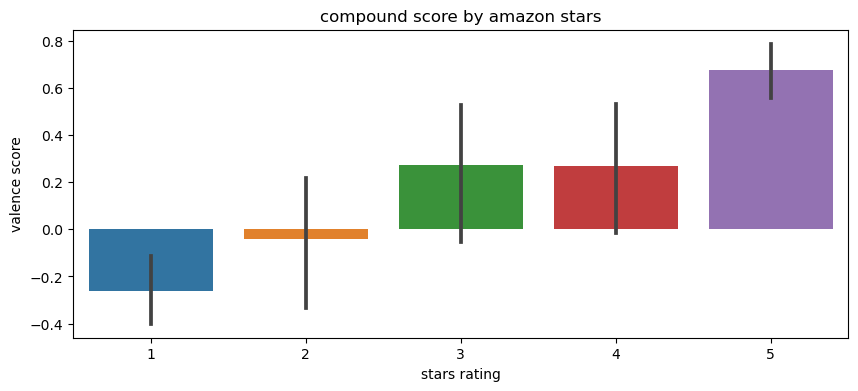

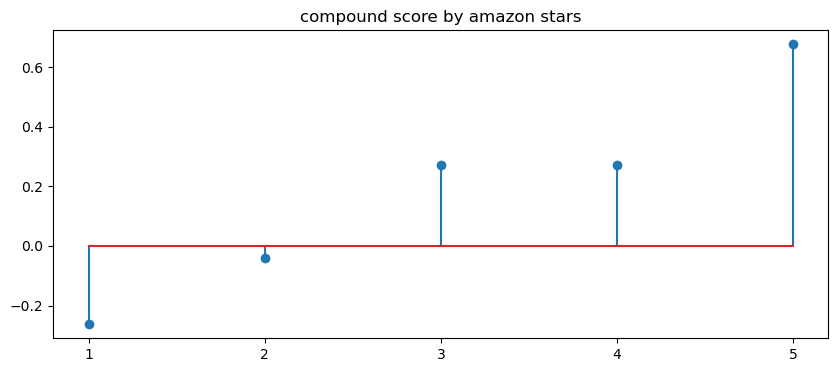

In [14]:
Visualisations.plot_VADER_output(df_v, df_sentiment)

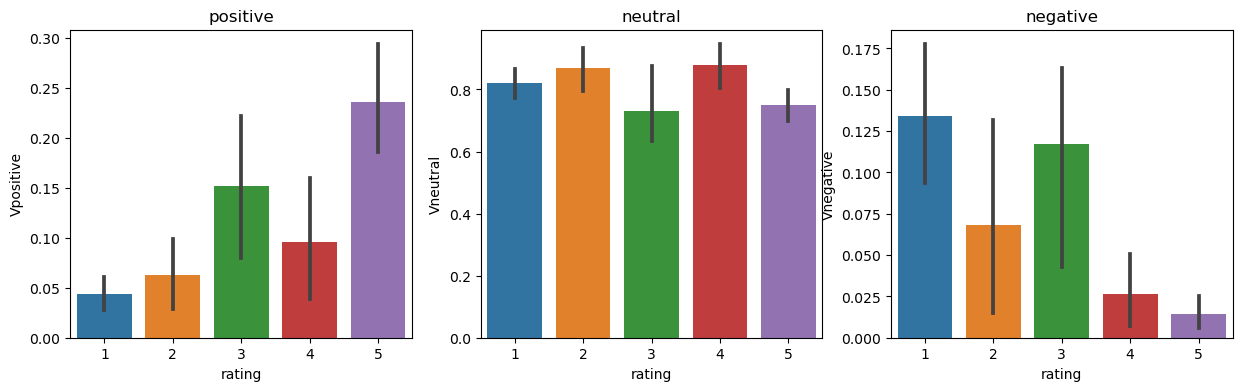

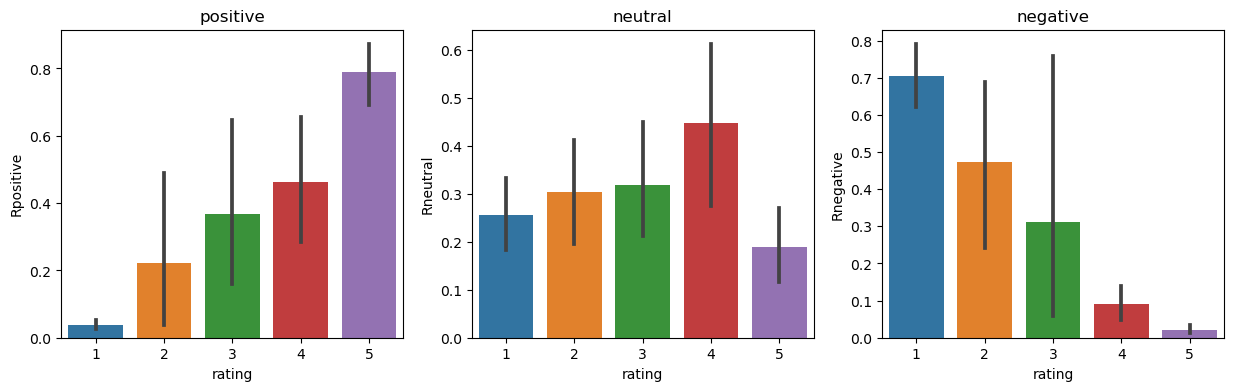

In [15]:
Visualisations.pnn_plots("V", df_sentiment)
Visualisations.pnn_plots("R", df_sentiment)


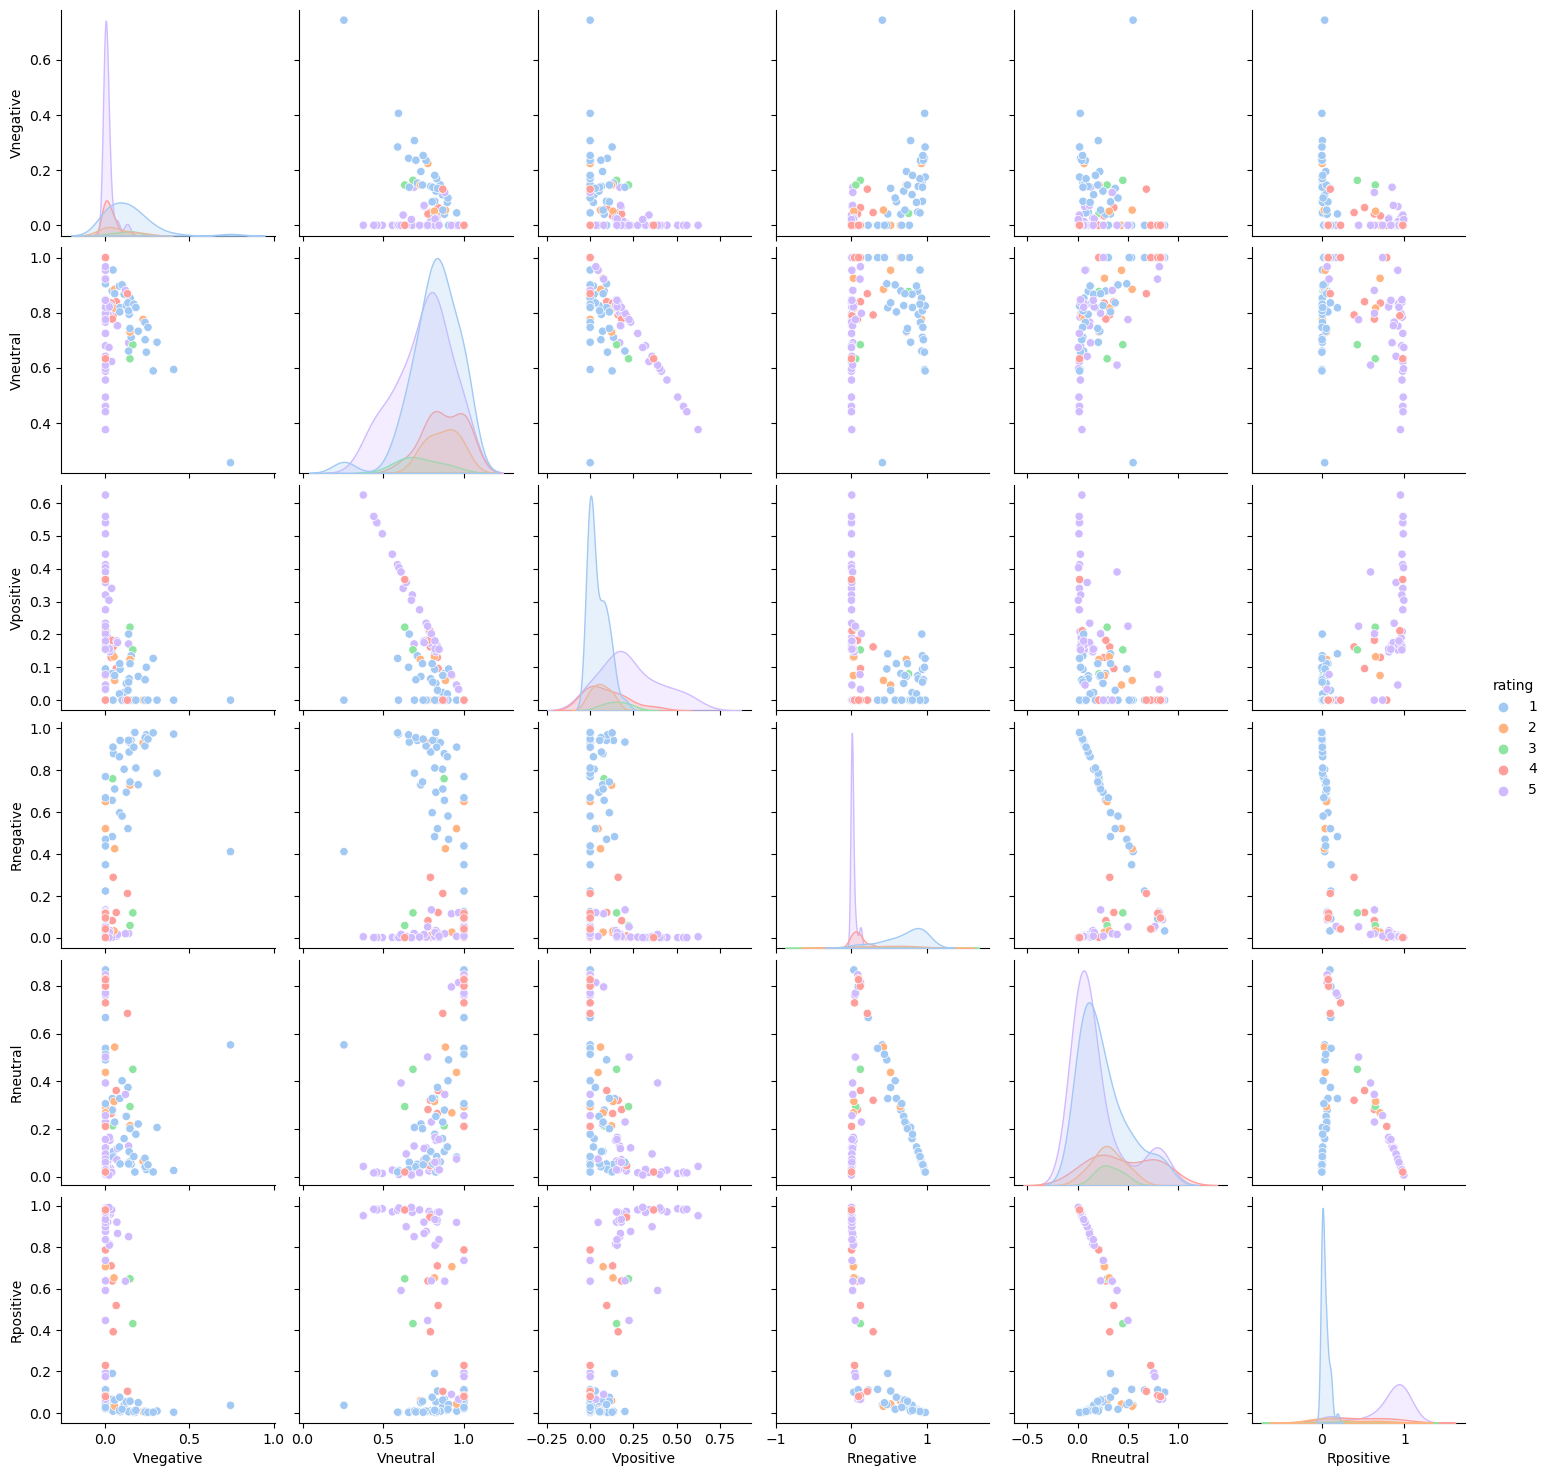

In [16]:
Visualisations.display_relationships(df_sentiment)

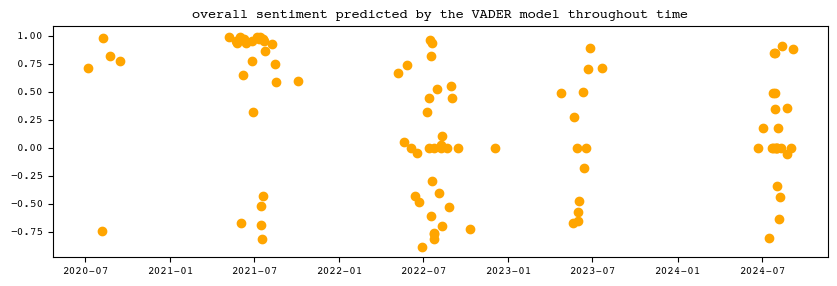

In [17]:
Visualisations.VADER_compound_sentiment_over_t(df_sentiment)

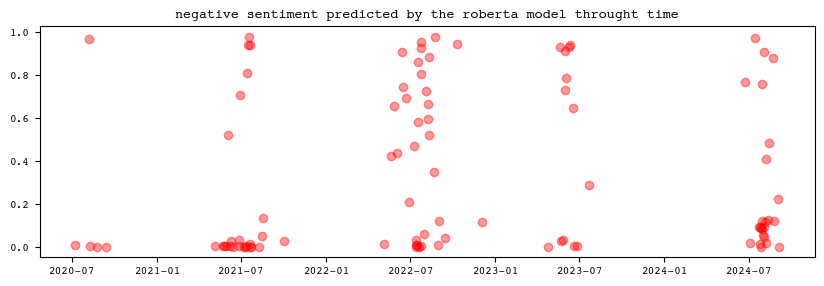

In [19]:
Visualisations.ROBERTA_negative_sentiment_over_t(df_sentiment)

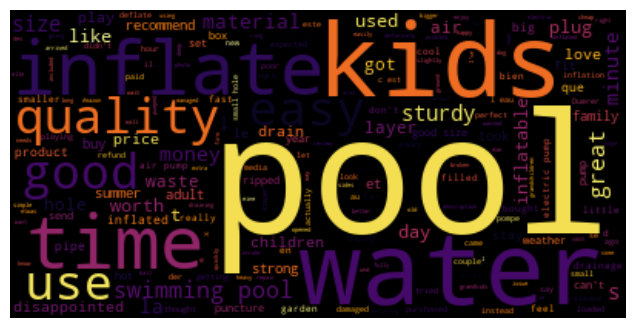

In [20]:
Visualisations.word_cloud(df_sentiment)

In [21]:
# descriptive statistics of our results

df_sentiment[["rating", "Vpositive", "Vneutral", "Vnegative", "Vcompound", "Rpositive", "Rneutral", "Rnegative"]].describe()


,rating,Vpositive,Vneutral,Vnegative,Vcompound,Rpositive,Rneutral,Rnegative
count,100.000000,100.00000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000
mean,3.050000,0.12962,0.800790,0.06955,0.198924,0.405016,0.257825,0.337160
std,1.827815,0.14866,0.156022,0.10945,0.595566,0.409617,0.258228,0.375123
min,1.000000,0.00000,0.256000,0.00000,-0.884100,0.002193,0.006879,0.001410
25%,1.000000,0.00000,0.721500,0.00000,-0.307000,0.035563,0.051471,0.008449
50%,4.000000,0.08750,0.819500,0.02200,0.140300,0.112632,0.171341,0.116124
75%,5.000000,0.18000,0.902000,0.12575,0.775450,0.880986,0.364199,0.728063
max,5.000000,0.62400,1.000000,0.74400,0.991700,0.991666,0.866675,0.978498


In [24]:
Display_best_and_worst_reviews.text("V", df_sentiment)
Display_best_and_worst_reviews.text("R", df_sentiment)

The best review according to model V: 
 Ideal for small gardens, grandkids love it, well worth the money 

The worst review according to model V: 
 Just opened and tested and it has a leak somewhere as it gone flat after 1 hour of use.As I didn't test it as soon as I got it I can't return for a refund.Waste of money I would stay away and go buy from a shop, Least you get a warranty from there.Waste of my money and time stay away 

The review with the highest sentiment according to VADER model: 
 Love this pool! perfect size and extremely easy to inflate got it done within minutes of using my air pump (which is not included). love the size and it met my family's needs. The pool is spacious and good to fit in 3 toddlers and their tons of their toys. Pool is made of good material and very sturdy and solid. Highly recommend this pool to anyone who needs to cool off this summer and glad it was available and the price was more than fair! In general, it is fantastic for the summertime and the

## LOGISTIC REGRESSION

Usually higher accuracy, however not good performance on predicting negative sentiment

(Project is unfinished at the moment)